# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.



## Goal

In this assignment, you will be asked to find insights from the data by using **pandas** to analyze and manipulate the data and **matplotlib** and **seaborn** for data visualization. You will get a bonus point if you can apply a logistic regression model to predict which passengers are more likely to survive in a separate test set. 

In [0]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

warnings.simplefilter(action='ignore', category=FutureWarning)

In [141]:
# load data
titanic = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Description of the data set
Here's a brief description of each column in the data.

- PassengerID: A column added by Kaggle to identify each row and make submissions easier
- Survived: Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass: The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex: The passenger's sex
- Age: The passenger's age in years
- SibSp: The number of siblings or spouses the passenger had aboard the Titanic
- Parch: The number of parents or children the passenger had aboard the Titanic
- Ticket: The passenger's ticket number
- Fare: The fare the passenger paid
- Cabin: The passenger's cabin number
- Embarked: The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [142]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Flynn, Mr. John",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### **Question 1: Find the number of missing values for each column.**
The first step in data analysis is to identify columns with missing data. Can you find the columns in this data with missing value as well as the number of records with missing value for each column?  

Hint: you will need [isna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isna.html) function.

In [143]:
# TODO
titanic.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### **Question 2: Impute missing values.**
Now we've identified the following columns with missing values: _Age_, _Cabin_ and _Embarked_. As the next step, we want to impute those missing values. There are three ways to impute the missing values:
- A constant value that has meaning within the domain.
- The mean, median or mode value based on non-missing values of that column.
- A random value drawn from other non-missing values of that column.

Please write code to impute the missing values as follows:
- the missing values of column _age_ with the mean of that column.
- the missing values of column _Cabin_ with a constant value 'other'.
- the missing values of column _Embarked_ with the [mode](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html) of that column.

In [144]:
# TODO
titanic['Age'].fillna((titanic['Age'].mean()), inplace=True)
titanic['Age'].isna().sum()

0

### **Question 3: What's the name of the person who has the 16th most expensive ticket?**

In [145]:
# TODO

titanic.nlargest(16, ['Fare']).iloc[[-1]]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
527,528,0,1,"Farthing, Mr. John",male,29.699118,0,0,PC 17483,221.7792,C95,S


### **Question 4: Out of all the females who survived, what's the name who has the 6th most expensive ticket?**

In [146]:
# TODO

titanic.loc[titanic['Sex'] == 'female'].nlargest(6, ['Fare']).iloc[[-1]]




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C


### **Question 5: Examine the survival rate**
Calculate the survival rate for different gender and Pclass combination and use a couple of sentences to describe your findings. Hint: pivot_table is your friend.

In [147]:
# TODO
pd.pivot_table(titanic, index=["Sex", "Pclass"], values=['Survived'])

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

### **Question 6: Is Age or Fare an important factor to one's chance of survival?**
Visualize the distribution of Column _Age_ for both survived and non-survived population and write down your findings based on the visualization.

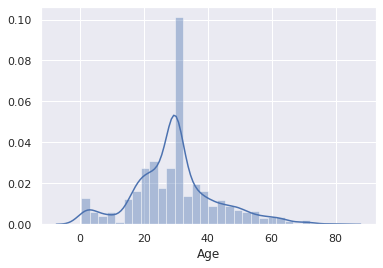

In [152]:
# TODO
sns.distplot(titanic.Age, label=True)


A large majority of the passengers were between the ages of 20 and 40 with over 10 percent being 30 years of age.

### **Question 7: Calculate and visualize the survival rate for discrete columns**
- Calculate the survival rate for column _SibSp_ and _Parch_.
- Use sns.barplot to visualize the survival rate for column _SibSp_ and _Parch_.

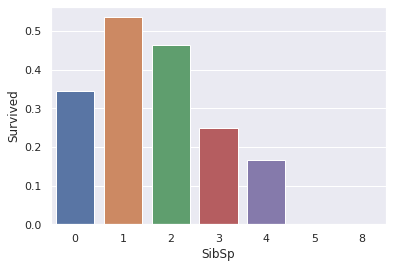

In [177]:
# TODO
pivoted_sibsp = pd.pivot_table(titanic, index=["SibSp"], values=['Survived'])
pivoted_sibsp = pivoted_sibsp.reset_index()
sns.barplot(x='SibSp',y='Survived',data=pivoted_sibsp)

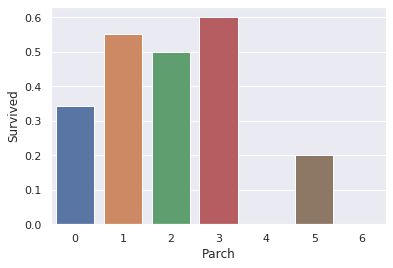

In [178]:
pivoted_parch = pd.pivot_table(titanic, index=["Parch"], values=['Survived'])
pivoted_parch = pivoted_parch.reset_index()
sns.barplot(x='Parch',y='Survived',data=pivoted_parch)

### **Question 8: Find the correlations.**
Find the correlations between the feature and the target variable _Survived_ and use heatmap to visualize it. Summarize your findings.

In [0]:
# TODO

### **Question 9: Any other insights do you draw by analyzing the data? Summarize the findings as well as provide the code leading you to the findings.**

In [0]:
# TODO

### **Bonus Point: Build a ML model to predict survival.**
Can you build a logistic regression model to predict the probability of survival for all the passengers in this [file](https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv)? You can evaluate your model accuracy on [Kaggle](https://www.kaggle.com/c/titanic). Can you think of any other ways to improve the model performance? Implement your idea to see if it actually works. 

In [0]:
# TODO